In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving online_shoppers_intention.csv to online_shoppers_intention.csv


In [ ]:
df = pd.read_csv("online_shoppers_intention.csv")

In [ ]:
# Encode các cột dạng categorical
le = LabelEncoder()
df['Month'] = le.fit_transform(df['Month'])
df['VisitorType'] = le.fit_transform(df['VisitorType'])
df['Weekend'] = df['Weekend'].astype(int)
df['Revenue'] = df['Revenue'].astype(int)

In [ ]:
# Chọn đặc trưng và nhãn
X = df.drop('Revenue', axis=1)
y = df['Revenue']

In [ ]:
# Chuẩn hóa các đặc trưng số
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
print("Dữ liệu đã sẵn sàng để huấn luyện mô hình.")
print(f"Train size: {X_train.shape[0]} mẫu")
print(f"Test size: {X_test.shape[0]} mẫu")

Dữ liệu đã sẵn sàng để huấn luyện mô hình.
Train size: 9864 mẫu
Test size: 2466 mẫu


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Huấn luyện mô hình
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Dự đoán trên tập test
y_pred = logreg.predict(X_test)

In [ ]:
# Đánh giá mô hình
print("ĐÁNH GIÁ MÔ HÌNH LOGISTIC REGRESSION:")

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

print("\nBÁO CÁO PHÂN LOẠI:")
print(classification_report(y_test, y_pred))

ĐÁNH GIÁ MÔ HÌNH LOGISTIC REGRESSION:
Accuracy: 0.8832
Precision: 0.7640
Recall: 0.3560
F1-score: 0.4857

BÁO CÁO PHÂN LOẠI:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2084
           1       0.76      0.36      0.49       382

    accuracy                           0.88      2466
   macro avg       0.83      0.67      0.71      2466
weighted avg       0.87      0.88      0.86      2466



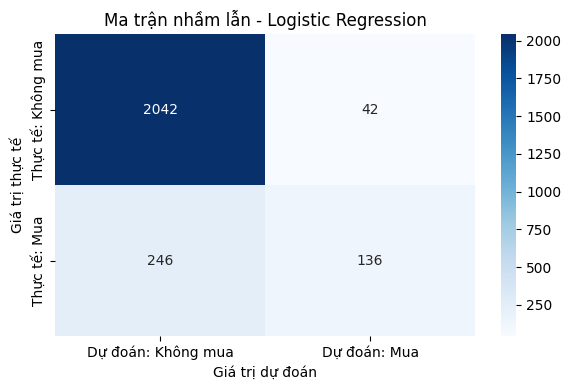

In [ ]:
cm = confusion_matrix(y_test, y_pred)
# Vẽ biểu đồ heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Dự đoán: Không mua', 'Dự đoán: Mua'],
            yticklabels=['Thực tế: Không mua', 'Thực tế: Mua'])

plt.title('Ma trận nhầm lẫn - Logistic Regression')
plt.xlabel('Giá trị dự đoán')
plt.ylabel('Giá trị thực tế')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Tạo và huấn luyện mô hình Decision Tree
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred_tree = tree_model.predict(X_test)

# Đánh giá hiệu suất mô hình
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)

print("ĐÁNH GIÁ MÔ HÌNH DECISION TREE:")
print(f"Accuracy: {accuracy_tree:.4f}")
print(f"Precision: {precision_tree:.4f}")
print(f"Recall: {recall_tree:.4f}")
print(f"F1-score: {f1_tree:.4f}")
print("\nBÁO CÁO PHÂN LOẠI:\n", classification_report(y_test, y_pred_tree))

ĐÁNH GIÁ MÔ HÌNH DECISION TREE:
Accuracy: 0.8998
Precision: 0.7039
Recall: 0.6099
F1-score: 0.6536

BÁO CÁO PHÂN LOẠI:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      2084
           1       0.70      0.61      0.65       382

    accuracy                           0.90      2466
   macro avg       0.82      0.78      0.80      2466
weighted avg       0.90      0.90      0.90      2466



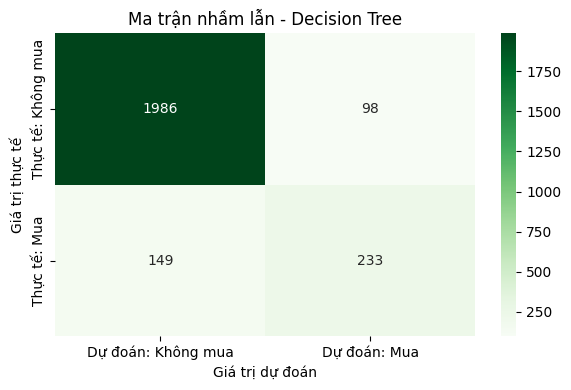

In [ ]:
cm_tree = confusion_matrix(y_test, y_pred_tree)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Dự đoán: Không mua', 'Dự đoán: Mua'],
            yticklabels=['Thực tế: Không mua', 'Thực tế: Mua'])

plt.title('Ma trận nhầm lẫn - Decision Tree')
plt.xlabel('Giá trị dự đoán')
plt.ylabel('Giá trị thực tế')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Tạo và huấn luyện mô hình Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42)
rf_model.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred_rf = rf_model.predict(X_test)

# Đánh giá hiệu suất mô hình
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("ĐÁNH GIÁ MÔ HÌNH RANDOM FOREST:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-score: {f1_rf:.4f}")
print("\nBÁO CÁO PHÂN LOẠI:\n", classification_report(y_test, y_pred_rf))

ĐÁNH GIÁ MÔ HÌNH RANDOM FOREST:
Accuracy: 0.9039
Precision: 0.7695
Recall: 0.5419
F1-score: 0.6359

BÁO CÁO PHÂN LOẠI:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      2084
           1       0.77      0.54      0.64       382

    accuracy                           0.90      2466
   macro avg       0.84      0.76      0.79      2466
weighted avg       0.90      0.90      0.90      2466



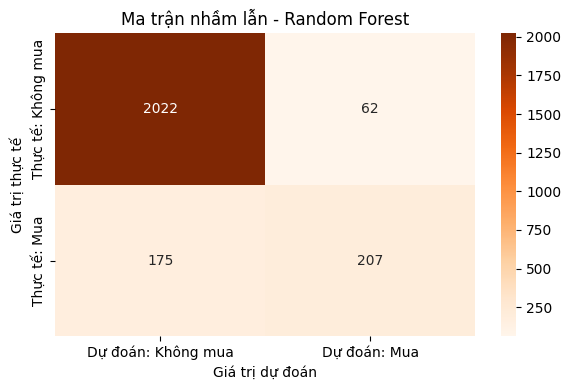

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Dự đoán: Không mua', 'Dự đoán: Mua'],
            yticklabels=['Thực tế: Không mua', 'Thực tế: Mua'])

plt.title('Ma trận nhầm lẫn - Random Forest')
plt.xlabel('Giá trị dự đoán')
plt.ylabel('Giá trị thực tế')
plt.tight_layout()
plt.show()

In [ ]:
# Tạo dict lưu kết quả đánh giá
results = {
    "Logistic Regression": {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred)
    },
    "Decision Tree": {
        "Accuracy": accuracy_tree,
        "Precision": precision_tree,
        "Recall": recall_tree,
        "F1": f1_tree
    },
    "Random Forest": {
        "Accuracy": accuracy_rf,
        "Precision": precision_rf,
        "Recall": recall_rf,
        "F1": f1_rf
    }
}

results_df = pd.DataFrame(results).T
print("BẢNG SO SÁNH HIỆU SUẤT CÁC MÔ HÌNH:")
display(results_df)

BẢNG SO SÁNH HIỆU SUẤT CÁC MÔ HÌNH:


,Accuracy,Precision,Recall,F1
Logistic Regression,0.883212,0.764045,0.356021,0.485714
Decision Tree,0.899838,0.703927,0.609948,0.653576
Random Forest,0.903893,0.769517,0.541885,0.635945


<Figure size 1000x600 with 0 Axes>

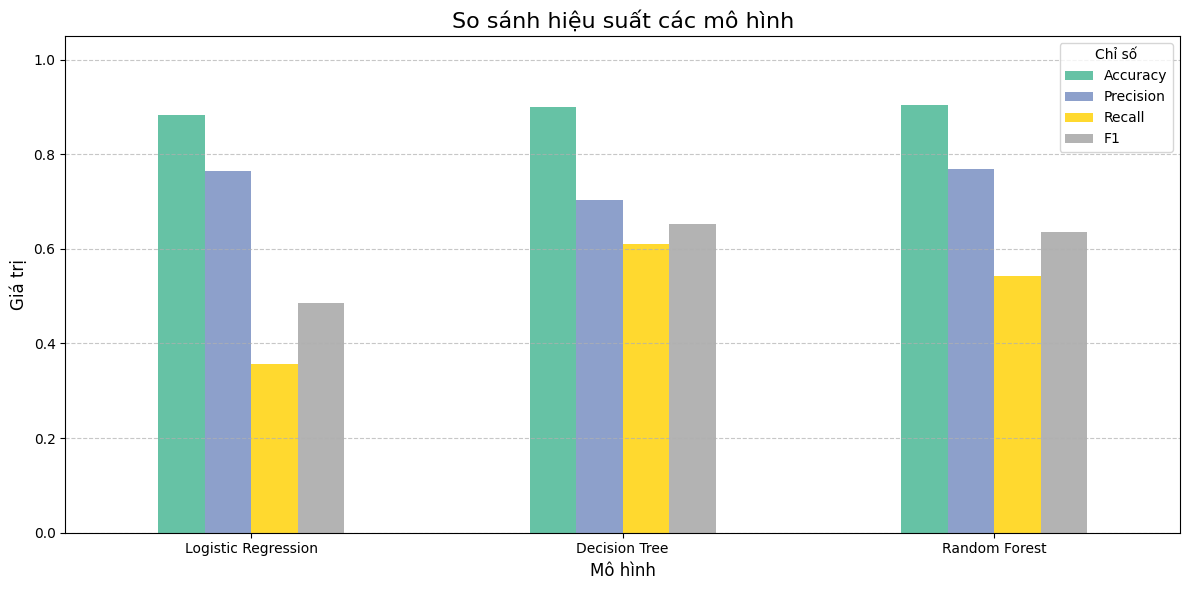

In [ ]:
# Thiết lập kích thước
plt.figure(figsize=(10, 6))

# Vẽ biểu đồ cột cho từng chỉ số
results_df.plot(kind='bar', figsize=(12, 6), colormap='Set2')

plt.title("So sánh hiệu suất các mô hình", fontsize=16)
plt.ylabel("Giá trị", fontsize=12)
plt.xlabel("Mô hình", fontsize=12)
plt.xticks(rotation=0)
plt.ylim(0, 1.05)  # Đảm bảo trục y hiển thị từ 0 đến 1
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend(title="Chỉ số")
plt.tight_layout()
plt.show()